In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.datasets import make_blobs
%matplotlib inline 
np.random.seed(3)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


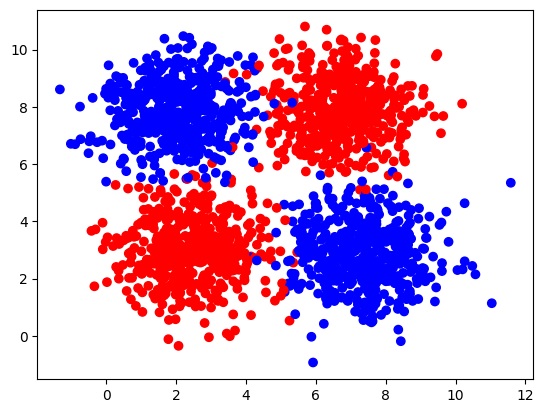

In [114]:
m = 2000
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0) | (labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 0
X = np.transpose(samples)
Y = labels.reshape((1, m))

plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));

In [115]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [116]:
#layer_sizes

def layer_sizes(X, Y):

    n_x=X.shape[0]
    n_h=2
    n_y=Y.shape[0]

    return (n_x, n_h, n_y)

In [117]:
(n_x, n_h, n_y) = layer_sizes(X, Y)

In [118]:


def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1) )   
   
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [119]:
parameters = initialize_parameters(n_x, n_h, n_y)


In [120]:

def forward_propagation(X, parameters):
    W1 = parameters.get("W1")
    b1 = parameters.get("b1")
    W2 =  parameters.get("W2")
    b2 =  parameters.get("b2")

    Z1 = np.matmul(W1,X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1)+b2
    A2 = sigmoid(Z2)
 

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [121]:
A2, cache = forward_propagation(X, parameters)

print(A2)

[[0.49920157 0.49922234 0.49921223 ... 0.49921215 0.49921043 0.49920665]]


In [122]:
def compute_cost(A2, Y):

    m = Y.shape[1]
    logloss = -Y*np.log(A2)-(1-Y)*np.log(1-A2)
    cost = np.sum(logloss)/m

    
    return cost

In [123]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X, Y)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-1.49856632e-05  1.67791519e-05]
 [-2.12394543e-05  2.43895135e-05]]
db1 = [[5.11207671e-07]
 [7.06236219e-07]]
dW2 = [[-0.00032641 -0.0002606 ]]
db2 = [[-0.00078732]]


In [124]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"] - learning_rate * grads["dW1"]
    b1 = parameters["b1"] - learning_rate * grads["db1"]
    W2 = parameters["W2"] - learning_rate * grads["dW2"]
    b2 = parameters["b2"] - learning_rate * grads["db2"]

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


In [125]:
def nn_model(X, Y, n_h, num_iterations=10000, learning_rate=1.2, print_cost=False):    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters=initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        
        cost =compute_cost(A2,Y)
        
   
        grads = backward_propagation(parameters,cache,X,Y)
    
        parameters = update_parameters(parameters,grads)

        
        
        if print_cost:
            print ("cost after iteration %i: %f" %(i, cost))

    return parameters

In [126]:
parameters = nn_model(X, Y, n_h=2, num_iterations=1000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

cost after iteration 0: 0.693148
cost after iteration 1: 0.693147
cost after iteration 2: 0.693147
cost after iteration 3: 0.693147
cost after iteration 4: 0.693147
cost after iteration 5: 0.693147
cost after iteration 6: 0.693147
cost after iteration 7: 0.693147
cost after iteration 8: 0.693147
cost after iteration 9: 0.693147
cost after iteration 10: 0.693147
cost after iteration 11: 0.693147
cost after iteration 12: 0.693147
cost after iteration 13: 0.693147
cost after iteration 14: 0.693147
cost after iteration 15: 0.693147
cost after iteration 16: 0.693147
cost after iteration 17: 0.693147
cost after iteration 18: 0.693147
cost after iteration 19: 0.693147
cost after iteration 20: 0.693147
cost after iteration 21: 0.693147
cost after iteration 22: 0.693146
cost after iteration 23: 0.693146
cost after iteration 24: 0.693146
cost after iteration 25: 0.693146
cost after iteration 26: 0.693146
cost after iteration 27: 0.693146
cost after iteration 28: 0.693146
cost after iteration 29:

In [127]:
def predict(X, parameters,threshold=0.5):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions


In [128]:
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])
Y_pred = predict(X_pred, parameters,threshold=0.2)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[2 8 2 8]
 [2 8 8 2]]
Predictions:
[[ True  True False False]]


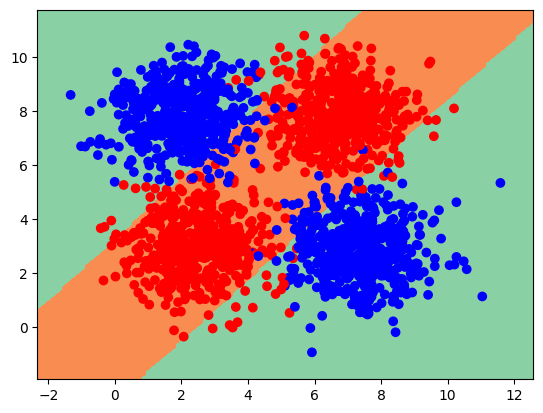

In [129]:
def plot_decision_boundary(predict, parameters, X, Y):

    min1, max1 = X[0, :].min()-1, X[0, :].max()+1
    min2, max2 = X[1, :].min()-1, X[1, :].max()+1

    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((1, len(r1))), r2.reshape((1, len(r2)))

    grid = np.vstack((r1,r2))
    predictions = predict(grid, parameters)
    zz = predictions.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral.reversed())
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));


plot_decision_boundary(predict, parameters, X, Y)


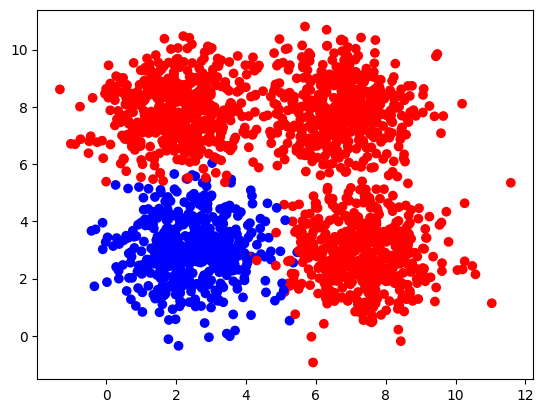

In [130]:
n_samples = 2000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)
labels[(labels == 0)] = 0
labels[(labels == 1)] = 1
labels[(labels == 2) | (labels == 3)] = 1
X_2 = np.transpose(samples)
Y_2 = labels.reshape((1,n_samples))

plt.scatter(X_2[0, :], X_2[1, :], c=Y_2, cmap=colors.ListedColormap(['blue', 'red']));

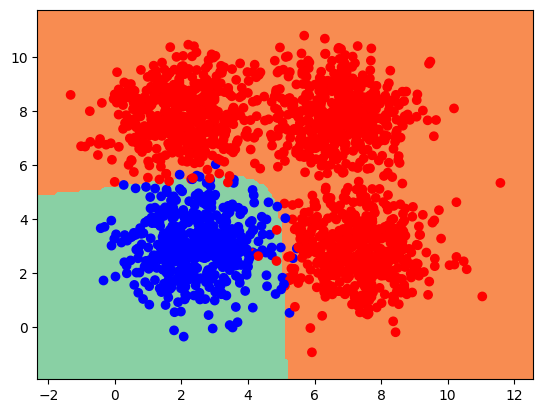

In [131]:
# parameters_2 = nn_model(X_2, Y_2, n_h=1, num_iterations=3000, learning_rate=1.2, print_cost=False)
parameters_2 = nn_model(X_2, Y_2, n_h=2, num_iterations=3000, learning_rate=1.2, print_cost=False)
# parameters_2 = nn_model(X_2, Y_2, n_h=15, num_iterations=3000, learning_rate=1.2, print_cost=False)


plot_decision_boundary(predict, parameters_2, X_2, Y_2)


In [132]:
import pandas as pd


df = pd.read_csv('wdbc.data', header=None)



X_data = df.iloc[:, 2:].values.astype(float)

Y_data = (df.iloc[:, 1] == 'M').astype(int).values.reshape(1, -1) 



print(f"Features shape: {X_data.shape}")

print(f"Labels shape: {Y_data.shape}")

print(f"Malignant count: {Y_data.sum()}, Benign count: {(Y_data==0).sum()}")

Features shape: (569, 30)
Labels shape: (1, 569)
Malignant count: 212, Benign count: 357


In [133]:
X_mean = np.mean(X_data, axis=0)

X_std = np.std(X_data, axis=0)

X_scaled = ((X_data - X_mean) / (X_std + 1e-8)).T  
Y_scaled = Y_data  

m = X_scaled.shape[1]

indices = np.arange(m)

np.random.seed(42)

np.random.shuffle(indices)

split = int(0.8 * m)

train_idx, test_idx = indices[:split], indices[split:]



X_train = X_scaled[:, train_idx]

X_test = X_scaled[:, test_idx]

Y_train = Y_scaled[:, train_idx]

Y_test = Y_scaled[:, test_idx]




In [134]:
X = X_train

Y = Y_train

(n_x, n_h, n_y) = (X.shape[0], 5, 1)  # n_h can be tuned



parameters = nn_model(X, Y, n_h=n_h, num_iterations=5000, learning_rate=1.0, print_cost=False)



Y_pred_test = predict(X_test, parameters)

test_accuracy = np.mean(Y_pred_test == Y_test)

print(f"test set accuracy: {test_accuracy*100:.2f}%")

test set accuracy: 94.74%
